## Libraries import

In [265]:
import numpy as np
import matplotlib.pyplot as plt

##  simple model from scratch

In [266]:
class linearRegression:
    
    def init_param(self):
        W = 0
        b = 0
        return W, b
        
    def forward_pass(self, X, W, b):
        y_hat = np.multiply(X,W)+b
        return y_hat
    
    def mse(self, y_hat, y):
        cost = np.sum((y_hat-y)**2)/(2*y.shape[0])
        return cost
    
    def backward_pass(self,X,y,y_hat):
        dW = np.sum((y_hat-y)*X)/y.shape[0]
        db = np.sum((y_hat-y))/y.shape[0]
        return dW,db
    
    def update_param(self,dW,db, learning_rate):
        self.W = self.W - learning_rate*dW
        self.b = self.b - learning_rate*db
        return self.W,self.b
    
    def fit(self,X,y, learning_rate=0.0001, num_iter=30):
        '''
        input:
        X = training set
        y = target feature
        learning_rate =  learning rate
        num_iter =  number of iterations
        
        output:
        W, b = parameters
        '''
        self.W, self.b = self.init_param()
        for i in range(num_iter):
            y_hat = self.forward_pass(X,self.W,self.b)
            cost = self.mse(y_hat,y)
            dW,db = self.backward_pass(X,y,y_hat)
            self.W,self.b = self.update_param(dW, db, learning_rate)
#             print(f"{i}.  cost={cost}  W={self.W}  b={self.b}")
        return self.W,self.b
        
    def predict(self,X):
        return self.forward_pass(X, self.W, self.b)

## example 1

In [267]:
X = np.arange(100)
y = X**2

In [268]:
lr = linearRegression()

In [269]:
lr.fit(X,y)

(74.62235088417214, -0.10638890728226234)

In [270]:
y_hat = lr.predict(X)

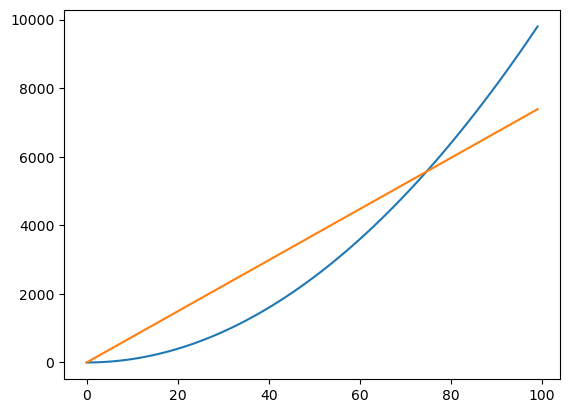

In [271]:
fig, ax = plt.subplots()
ax.plot(X,y)
ax.plot(X,y_hat)

## example 2

In [272]:
X = np.arange(20)
y = np.sin(X)

In [273]:
linreg = linearRegression()

In [274]:
linreg.fit(X,y,learning_rate=0.001, num_iter=25)

(-0.006137935741069657, 0.0011321303472100947)

In [275]:
y_hat = linreg.predict(X)

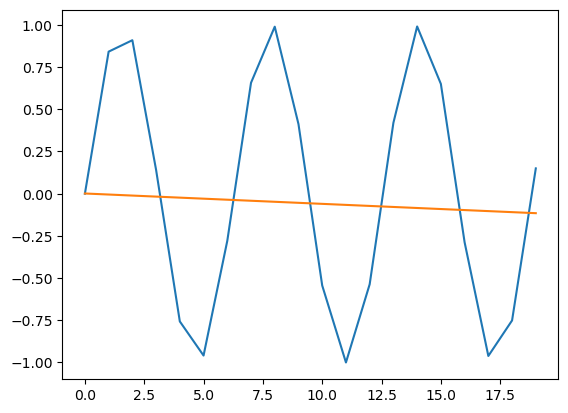

In [276]:
fig, ax = plt.subplots()
ax.plot(X,y)
ax.plot(X,y_hat)